In [ ]:
#CODIGO PARA BAJAR LA RESOLUCION DE LA IMAGEN!
#SITUACIONES PARA USARLO: 
#1) ENVIARLE RESULTADO AL CLIENTE DEL RESULTADO PARA QUE LO VEA (PODRIA AGREGAR MARCA DE AGUA DIRECTAMENTE)
#2) LA IMAGEN CONTENIDO QUE LE DOY AL ALGORITMO ES MUY PESADA (MUY ALTA RESOLUCION) Y PARA ACELERAR EL PROCESO BAJO LA RESOLUCION
#CHUSMEAR BOT PARA PONER MARCA DE AGUA:https://github.com/alistvt/watermarker-bot


In [1]:
#PENDIENTE:
#A) DEJAR PARAMETRIZADO SI QUIERO LA IMAGEN:
#1)CON BAJA RES. 2) CON MARCA DE AGUA 3) --> 1) + 2)
#B) MARCA DE AGUA

#PARAMETROS
transp = 0.75 #PONER ACA LA TRANSPARENCIA DESEADA [0,1]
setup = 0 #IMAGEN BAJA RES. + MARCA = 1 / IMAGEN BAJA RES. SIN MARCA = 0

In [2]:
# CORRER ESTO UNA SOLA VEZ ANTES DE USAR!
!apt install imagemagick 
!pip install wand

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

SELECCIONAR IMAGENES A REDUCIR RESOLUCION


Saving ACP_3884.jpg to ACP_3884.jpg
User uploaded file "ACP_3884.jpg" with length 10754887 bytes
STYLE IMAGE 0


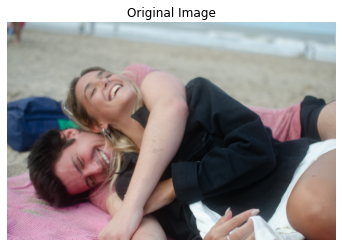

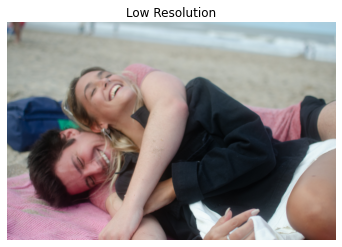

Saved as LR_ACP_3884.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from google.colab import files
import PIL.Image


os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save to.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s" % filename)
  print("Saved as %s" % filename)

#%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)
  plt.show()

def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

'''
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)
'''

#snippet que agarra las imagenes del file explorer y for que guarda los nombres de los archivos
print("SELECCIONAR IMAGENES A REDUCIR RESOLUCION")
hr_image = files.upload()
for fn in hr_image.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(hr_image[fn])))
 
imagenes = list(hr_image.keys())

#visualizo imagenes seleccionadas
for i in range(len(imagenes)):
  from PIL import Image

  hr_image = preprocess_image(imagenes[i])
  print("STYLE IMAGE " + str(i))
  #plt.imshow(np.squeeze(hr_image))
  #plt.show()  

  #hr_image = preprocess_image(image_path)

  # Plotting original Image
  plot_image(tf.squeeze(hr_image), title="Original Image")
  plt.show()
  #print("Resolucion Original Image: " + hr_image.shape)

  lr_image = downscale_image(tf.squeeze(hr_image))
  # Plotting Low Resolution Image
  plot_image(tf.squeeze(lr_image), title="Low Resolution")
  plt.show()
  #print("Resolucion LR Image: " + lr_image.shape)


  file_name = 'LR_' + imagenes[i]
  save_image(tf.squeeze(lr_image), filename = file_name)
  
  
 
  
  if setup == 1:
    wm = files.upload()

    for fn in wm_imgs.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(wm_imgs[fn])))
  
    #wm_imgs_list = list(wm_imgs.keys()) #ESTO LO USO SI CARGO POR SEPARADO LAS IMAGENES A PONER MARCA DE AGUA>idem el resto de los comentarios
    wm_imgs_list = file_name
    wm_list = list(wm.keys())





    
    backgr = tf.image.decode_image(tf.io.read_file(wm_imgs_list)) #tf.image.decode_image(tf.io.read_file(wm_imgs_list[i])) 
    waterm = tf.image.decode_image(tf.io.read_file(wm_list[0]))
    
    waterm = tf.image.resize(
        waterm, backgr.shape[:2])
    
    
  
    
    #file_name = wm_imgs_list #wm_imgs_list[i]
    file_name_wm = 'watermarked_' + wm_imgs_list #'watermarked_' + file_name

    from wand.image import Image

    with Image(filename = wm_imgs_list) as background: #filename = wm_imgs_list[i]
      with Image(filename = wm_list[0] ) as watermark:
        background.watermark(image=watermark, transparency = transp ) #, left = 200 , top = 200)
      background.save(filename = file_name_wm)

    img = tf.image.decode_image(tf.io.read_file(file_name_wm))
    plt.imshow(img)
    plt.show()  

  try:
    from google.colab import files
  except ImportError:
    pass
  else:
    if setup == 1:
      files.download(file_name_wm)
    else:
      files.download(file_name)
